In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
train_ims = np.load('train_images.npy')
train_labels = np.load('train_labels.npy')

In [3]:
print(train_ims.shape,train_labels.shape)
train_size = train_labels.shape[0]

(28, 28, 5200) (5200, 1)


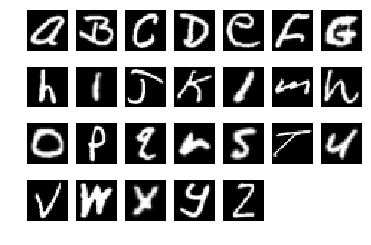

In [4]:
cur_letter = 1
sample_ind = list()

row = 4
col = 7
fig = plt.figure()

for i in range(train_size):
    if(cur_letter == train_labels[i]):
        ax = plt.subplot(row, col, cur_letter)
        plt.imshow(train_ims[:,:,i], cmap='gray')
        ax.axis('off')
        ax.autoscale(False)
        sample_ind.append(i)
        cur_letter += 1

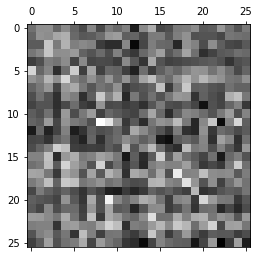

In [5]:
num_class = 26
corr_matrix = np.zeros(num_class**2).reshape(num_class,num_class)

for i in range(num_class):
    for j in range(num_class):
        corr_matrix[i,j] = np.corrcoef(train_ims[:,:,sample_ind[i]].flat, train_ims[:,:,sample_ind[j]+1].flat)[0,1]
        
plt.matshow(corr_matrix, cmap='gray')
plt.show()

In [6]:
#convert training ouputs to one-hot encodings

train_one_hot = np.zeros(num_class*train_size).reshape(num_class,train_size)

for i in range(train_size):
    train_one_hot[train_labels[i]-1,i] = 1

print(train_one_hot)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [7]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

def forward(W, x, b):
    return sigmoid(np.matmul(W,x) - b)

In [8]:
meanPrm = 0
stdPrm = 0.01

pixelWH = train_ims.shape[0]

In [9]:


bias = np.random.normal(meanPrm, stdPrm, num_class).reshape(num_class,1)  
print(bias.shape)

weights = np.random.normal(meanPrm,stdPrm, num_class*pixelWH**2).reshape(num_class,pixelWH**2)
print(weights.shape)

mseList = list()
num_iter = 10000
lrn_rate = 0.04

for i in range(num_iter):
    random_index = random.randint(0,train_size-1)
    
    random_img = train_ims[:,:,random_index].reshape(pixelWH**2,1)
    random_img = random_img/np.amax(random_img)
    random_y = train_one_hot[:,random_index].reshape(num_class,1)
    
    y_hat = forward(weights, random_img, bias)
    
    y_diff = random_y - y_hat
    
    w_grd = -2*np.matmul(y_diff*(y_hat)*(1-y_hat),np.transpose(random_img))
    b_grd = 2*y_diff*(y_hat)*(1-y_hat)
    
    weights -= lrn_rate*w_grd
    bias -= lrn_rate*b_grd
    
    mseList.append(np.sum(y_diff**2)/(y_diff.shape[0]))

    

(26, 1)
(26, 784)


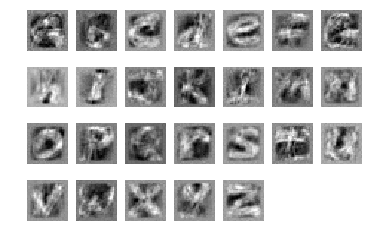

In [10]:
row = 4
col = 7


for i in range(num_class):
    ax2 = plt.subplot(row, col, i+1)
    weight_dig = weights[i,:].reshape(pixelWH,pixelWH) 
    plt.imshow(weight_dig, cmap='gray')
    plt.rcParams['figure.figsize'] = [8,8]
    ax2.axis('off')
    ax2.autoscale(False)    

In [11]:
biasHi = np.random.normal(meanPrm, stdPrm, num_class).reshape(num_class,1)  
weightsHi = np.random.normal(meanPrm,stdPrm, num_class*pixelWH**2).reshape(num_class,pixelWH**2)

biasLow = np.random.normal(meanPrm, stdPrm, num_class).reshape(num_class,1)  
weightsLow = np.random.normal(meanPrm,stdPrm, num_class*pixelWH**2).reshape(num_class,pixelWH**2)

lrn_rate_Low = 0.0001
lrn_rate_Hi = 0.9

mseListHi = list()
mseListLow = list()

for i in range(num_iter):
    random_index = random.randint(0,train_size-1)
    
    random_img = train_ims[:,:,random_index].reshape(pixelWH**2,1)
    random_img = random_img/np.amax(random_img)
    random_y = train_one_hot[:,random_index].reshape(num_class,1)
    
    y_hat = forward(weightsHi, random_img, biasHi)
    
    y_diff = random_y - y_hat
    
    w_grd = -2*np.matmul(y_diff*(y_hat)*(1-y_hat),np.transpose(random_img))
    b_grd = 2*y_diff*(y_hat)*(1-y_hat)
    
    weightsHi -= lrn_rate_Hi*w_grd
    biasHi -= lrn_rate_Hi*b_grd
    
    mseListHi.append(np.sum(y_diff**2)/(y_diff.shape[0]))
    
for i in range(num_iter):
    random_index = random.randint(0,train_size-1)
    
    random_img = train_ims[:,:,random_index].reshape(pixelWH**2,1)
    random_img = random_img/np.amax(random_img)
    random_y = train_one_hot[:,random_index].reshape(num_class,1)
    
    y_hat = forward(weightsLow, random_img, biasLow)
    
    y_diff = random_y - y_hat
    
    w_grd = -2*np.matmul(y_diff*(y_hat)*(1-y_hat),np.transpose(random_img))
    b_grd = 2*y_diff*(y_hat)*(1-y_hat)
    
    weightsLow -= lrn_rate_Low*w_grd
    biasLow -= lrn_rate_Low*b_grd
    
    mseListLow.append(np.sum(y_diff**2)/(y_diff.shape[0]))


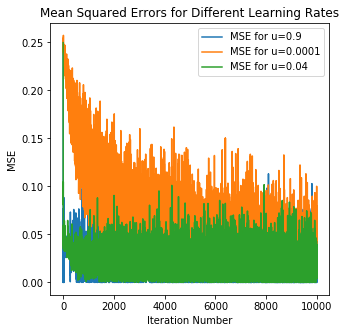

In [12]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(mseListHi)
plt.plot(mseListLow)
plt.plot(mseList)
plt.legend(["MSE for u="+str(lrn_rate_Hi), "MSE for u="+str(lrn_rate_Low), "MSE for u="+str(lrn_rate)])
plt.title("Mean Squared Errors for Different Learning Rates")
plt.xlabel("Iteration Number")
plt.ylabel("MSE")
plt.show()

In [13]:
test_img = np.load('test_images.npy')
test_labels = np.load('test_labels.npy')
print(test_img.shape, test_labels.shape)

test_img = test_img.reshape(pixelWH**2,test_labels.shape[0])
print(test_img.shape)

test_size = test_labels.shape[0]

bias_matrix = np.zeros(num_class*test_size).reshape(num_class, test_size)
for i in range(test_size):
    bias_matrix[:,i] = bias.flatten()
print(bias_matrix.shape)    


(28, 28, 1300) (1300, 1)
(784, 1300)
(26, 1300)


In [14]:
test_img_nor = test_img/np.amax(test_img)
pred = sigmoid(np.matmul(weights,test_img_nor)-bias_matrix)
print(pred[:,300])

[1.90188438e-02 3.02530574e-02 5.15068812e-01 3.10495432e-03
 4.36609980e-03 6.41488153e-04 1.06884238e-01 2.10433039e-04
 1.60702663e-04 1.47859047e-01 1.92547736e-04 3.15630141e-02
 2.08373769e-04 8.69906471e-03 8.82947370e-01 4.50741148e-03
 2.40084085e-02 1.48843885e-03 4.15929672e-01 7.29844147e-02
 3.90104996e-03 1.59825846e-04 8.19776204e-06 8.22562351e-04
 3.93800537e-03 5.03315691e-02]


In [15]:
pred_indices = np.zeros(pred.shape[1])

for i in range(pred.shape[1]):
    pred_indices[i] = np.argmax(pred[:,i])+1

true_cnt = 0
for i in range(pred_indices.shape[0]):
    if(pred_indices[i] == test_labels[i]):
        true_cnt += 1;
        
print('Accuracy: ', true_cnt/test_labels.shape[0]*100)

Accuracy:  59.30769230769231


In [16]:
bias_matrix_low = np.zeros(num_class*test_size).reshape(num_class, test_size)
for i in range(test_size):
    bias_matrix_low[:,i] = biasLow.flatten()

predLow = sigmoid(np.matmul(weightsLow,test_img_nor)-bias_matrix_low)

pred_indices_Low = np.zeros(predLow.shape[1])

for i in range(predLow.shape[1]):
    pred_indices_Low[i] = np.argmax(predLow[:,i])+1

true_cnt_low = 0
for i in range(pred_indices_Low.shape[0]):
    if(pred_indices_Low[i] == test_labels[i]):
        true_cnt_low += 1;
        
print('Accuracy: ', true_cnt_low/test_labels.shape[0]*100)

Accuracy:  28.000000000000004


In [17]:
bias_matrix_hi = np.zeros(num_class*test_size).reshape(num_class, test_size)
for i in range(test_size):
    bias_matrix_hi[:,i] = biasHi.flatten()

predHi = sigmoid(np.matmul(weightsHi,test_img_nor)-bias_matrix_hi)

pred_indices_Hi= np.zeros(predHi.shape[1])

for i in range(predHi.shape[1]):
    pred_indices_Hi[i] = np.argmax(predHi[:,i])+1

true_cnt_hi = 0
for i in range(pred_indices_Hi.shape[0]):
    if(pred_indices_Hi[i] == test_labels[i]):
        true_cnt_hi += 1;
        
print('Accuracy: ', true_cnt_hi/test_labels.shape[0]*100)

Accuracy:  25.769230769230766
